In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')


In [2]:
# print first five columns
data=pd.read_csv('creditrisk.csv')
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
# print all columns
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [4]:
# print all information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
#drop columns
data.drop(columns=['ID','Customer_ID','Month','Age','Monthly_Inhand_Salary','Credit_Mix','Credit_History_Age','Payment_Behaviour','Name','SSN'], inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Occupation                100000 non-null  object 
 1   Annual_Income             100000 non-null  object 
 2   Num_Bank_Accounts         100000 non-null  int64  
 3   Num_Credit_Card           100000 non-null  int64  
 4   Interest_Rate             100000 non-null  int64  
 5   Num_of_Loan               100000 non-null  object 
 6   Type_of_Loan              88592 non-null   object 
 7   Delay_from_due_date       100000 non-null  int64  
 8   Num_of_Delayed_Payment    92998 non-null   object 
 9   Changed_Credit_Limit      100000 non-null  object 
 10  Num_Credit_Inquiries      98035 non-null   float64
 11  Outstanding_Debt          100000 non-null  object 
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Payment_of_Min_Amount     100000 non-null  ob

In [7]:
#data conversion
data['Num_of_Delayed_Payment'] = pd.to_numeric(data['Num_of_Delayed_Payment'], errors='coerce')


In [8]:
data['Num_of_Loan'] = pd.to_numeric(data['Num_of_Loan'], errors='coerce')


In [9]:
data['Num_Credit_Inquiries'] = pd.to_numeric(data['Num_Credit_Inquiries'], errors='coerce')


In [10]:
data['Annual_Income'] = pd.to_numeric(data['Annual_Income'], errors='coerce')
data['Interest_Rate'] = pd.to_numeric(data['Interest_Rate'], errors='coerce')
data['Num_of_Loan'] = pd.to_numeric(data['Num_of_Loan'], errors='coerce')
data['Changed_Credit_Limit'] = pd.to_numeric(data['Changed_Credit_Limit'], errors='coerce')
data['Outstanding_Debt'] = pd.to_numeric(data['Outstanding_Debt'], errors='coerce')
data['Amount_invested_monthly'] = pd.to_numeric(data['Amount_invested_monthly'], errors='coerce')
data['Monthly_Balance'] = pd.to_numeric(data['Monthly_Balance'], errors='coerce')





In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Occupation                100000 non-null  object 
 1   Annual_Income             93020 non-null   float64
 2   Num_Bank_Accounts         100000 non-null  int64  
 3   Num_Credit_Card           100000 non-null  int64  
 4   Interest_Rate             100000 non-null  int64  
 5   Num_of_Loan               95215 non-null   float64
 6   Type_of_Loan              88592 non-null   object 
 7   Delay_from_due_date       100000 non-null  int64  
 8   Num_of_Delayed_Payment    90254 non-null   float64
 9   Changed_Credit_Limit      97909 non-null   float64
 10  Num_Credit_Inquiries      98035 non-null   float64
 11  Outstanding_Debt          98991 non-null   float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Payment_of_Min_Amount     100000 non-null  ob

In [12]:
# Rename the column
data.rename(columns={'Num_Credit_Inquiries': 'Num_of_Credit_Inquiries'}, inplace=True)

In [13]:
#handle the null values
data.isnull().sum()

Occupation                      0
Annual_Income                6980
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  4785
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       9746
Changed_Credit_Limit         2091
Num_of_Credit_Inquiries      1965
Outstanding_Debt             1009
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      8784
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

In [14]:
data['Num_of_Delayed_Payment'].fillna(data['Num_of_Delayed_Payment'].median(), inplace=True)
data['Num_of_Credit_Inquiries'].fillna(data['Num_of_Credit_Inquiries'].median(), inplace=True)
data['Amount_invested_monthly'].fillna(data['Amount_invested_monthly'].median(), inplace=True)
data['Monthly_Balance'].fillna(data['Monthly_Balance'].median(), inplace=True)
data['Annual_Income'].fillna(data['Annual_Income'].median(), inplace=True)
data['Num_of_Loan'].fillna(data['Num_of_Loan'].median(), inplace=True)
data['Changed_Credit_Limit'].fillna(data['Changed_Credit_Limit'].median(), inplace=True)
data['Outstanding_Debt'].fillna(data['Outstanding_Debt'].median(), inplace=True)
data['Type_of_Loan'].fillna("Not Specified", inplace=True)

In [15]:
data.isnull().sum()

Occupation                  0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_of_Credit_Inquiries     0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [16]:
#clean numeric data
data['Num_of_Loan'] = data['Num_of_Loan'].apply(np.abs)
data['Delay_from_due_date'] = data['Delay_from_due_date'].apply(np.abs)
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].apply(np.abs)
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].apply(np.abs)


In [17]:
#standardize the text data into lower case
text_columns = data.select_dtypes(include=['object']).columns
def standardize_text(text):
    if pd.isnull(text):
        return text  # Keep NaN values as is
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text
for col in text_columns:
    data[col] = data[col].apply(standardize_text)

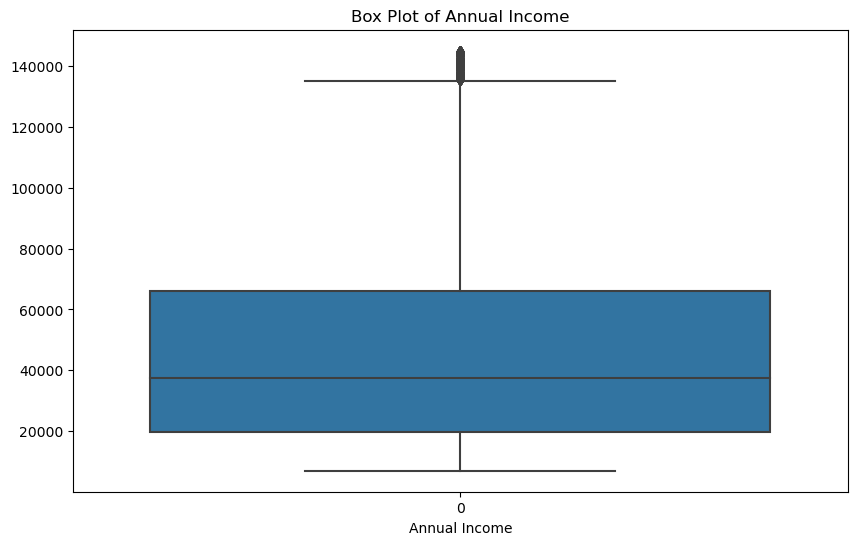

In [18]:
# Handle the Outliers
Q1 = data['Annual_Income'].quantile(0.25)
Q3 = data['Annual_Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_data = data[(data['Annual_Income'] >= lower_bound) & (data['Annual_Income'] <= upper_bound)]
plt.figure(figsize=(10, 6))
sns.boxplot(filtered_data['Annual_Income'])
plt.title('Box Plot of Annual Income')
plt.xlabel('Annual Income')
plt.show()


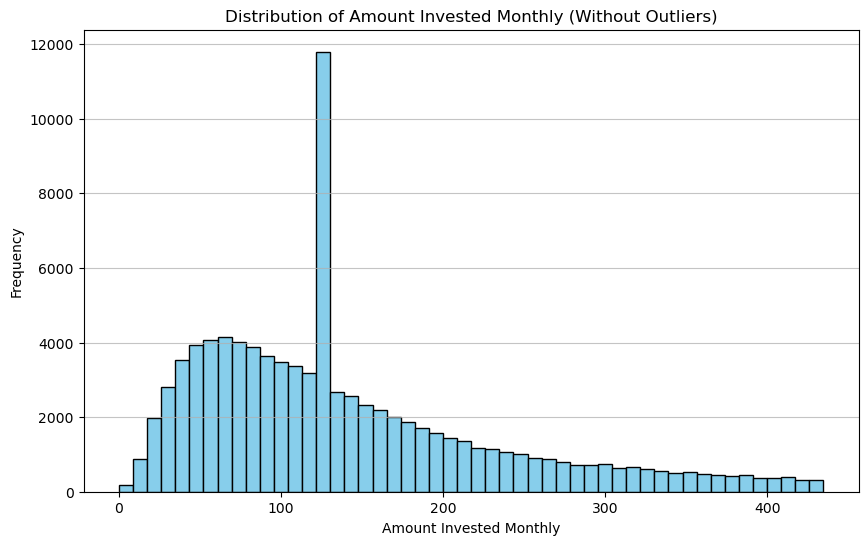

In [19]:
# Handle the outliers
Q1_amount = data['Amount_invested_monthly'].quantile(0.25)
Q3_amount = data['Amount_invested_monthly'].quantile(0.75)
IQR_amount = Q3_amount - Q1_amount
lower_bound_amount = Q1_amount - 1.5 * IQR_amount
upper_bound_amount = Q3_amount + 1.5 * IQR_amount
filtered_data_amount = data[(data['Amount_invested_monthly'] >= lower_bound_amount) & (data['Amount_invested_monthly'] <= upper_bound_amount)]
plt.figure(figsize=(10, 6))
plt.hist(filtered_data_amount['Amount_invested_monthly'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Amount Invested Monthly (Without Outliers)')
plt.xlabel('Amount Invested Monthly')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [20]:
#Label Encoding
label_encoder = LabelEncoder()
data['Credit_Score_encoded'] = label_encoder.fit_transform(data['Credit_Score'])
one_hot_encoded_occupation = pd.get_dummies(data['Occupation'], prefix='Occupation')
data_encoded = data.join(one_hot_encoded_occupation)



In [21]:
data.head(60)

,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_of_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Score_encoded
0,scientist,19114.12,3,4,3,4.0,auto loan creditbuilder loan personal loan and...,3,7.0,11.27,4.0,809.98,26.822620,no,49.574949,80.415295,312.494089,good,0
1,scientist,19114.12,3,4,3,4.0,auto loan creditbuilder loan personal loan and...,1,14.0,11.27,4.0,809.98,31.944960,no,49.574949,118.280222,284.629162,good,0
2,scientist,19114.12,3,4,3,4.0,auto loan creditbuilder loan personal loan and...,3,7.0,9.40,4.0,809.98,28.609352,no,49.574949,81.699521,331.209863,good,0
3,scientist,19114.12,3,4,3,4.0,auto loan creditbuilder loan personal loan and...,5,4.0,6.27,4.0,809.98,31.377862,no,49.574949,199.458074,223.451310,good,0
4,scientist,19114.12,3,4,3,4.0,auto loan creditbuilder loan personal loan and...,6,14.0,11.27,4.0,809.98,24.797347,no,49.574949,41.420153,341.489231,good,0
5,scientist,19114.12,3,4,3,4.0,auto loan creditbuilder loan personal loan and...,8,4.0,9.27,4.0,809.98,27.262259,no,49.574949,62.430172,340.479212,good,0
6,scientist,19114.12,3,4,3,4.0,auto loan creditbuilder loan personal loan and...,3,14.0,11.27,4.0,809.98,22.537593,no,49.574949,178.344067,244.565317,good,0
7,scientist,19114.12,3,4,3,4.0,auto loan creditbuilder loan personal loan and...,3,6.0,11.27,4.0,809.98,23.933795,no,49.574949,24.785217,358.124168,standard,2
8,,34847.84,2,4,6,1.0,creditbuilder loan,3,4.0,5.42,2.0,605.03,24.464031,no,18.816215,104.291825,470.690627,standard,2
9,teacher,34847.84,2,4,6,1.0,creditbuilder loan,7,1.0,7.42,2.0,605.03,38.550848,no,18.816215,40.391238,484.591214,good,0


In [22]:
#Feature Engg
data['Income_to_Investment_Ratio'] = data.apply(lambda row: row['Annual_Income'] / row['Amount_invested_monthly'] if row['Amount_invested_monthly'] > 0 else np.nan, axis=1)
data['Loan_Affordability'] = pd.cut(data['Annual_Income'], bins=[0, 30000, 60000, 90000, np.inf], labels=['Low', 'Medium', 'High', 'Very High'])
data[['Annual_Income', 'Amount_invested_monthly', 'Income_to_Investment_Ratio', 'Loan_Affordability']].head()

,Annual_Income,Amount_invested_monthly,Income_to_Investment_Ratio,Loan_Affordability
0,19114.12,80.415295,237.692592,Low
1,19114.12,118.280222,161.600306,Low
2,19114.12,81.699521,233.956328,Low
3,19114.12,199.458074,95.830264,Low
4,19114.12,41.420153,461.469081,Low


In [23]:
#Transformation
numerical_features = ['Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Credit_Score_encoded']
X = StandardScaler().fit_transform(data[numerical_features])
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X)
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]

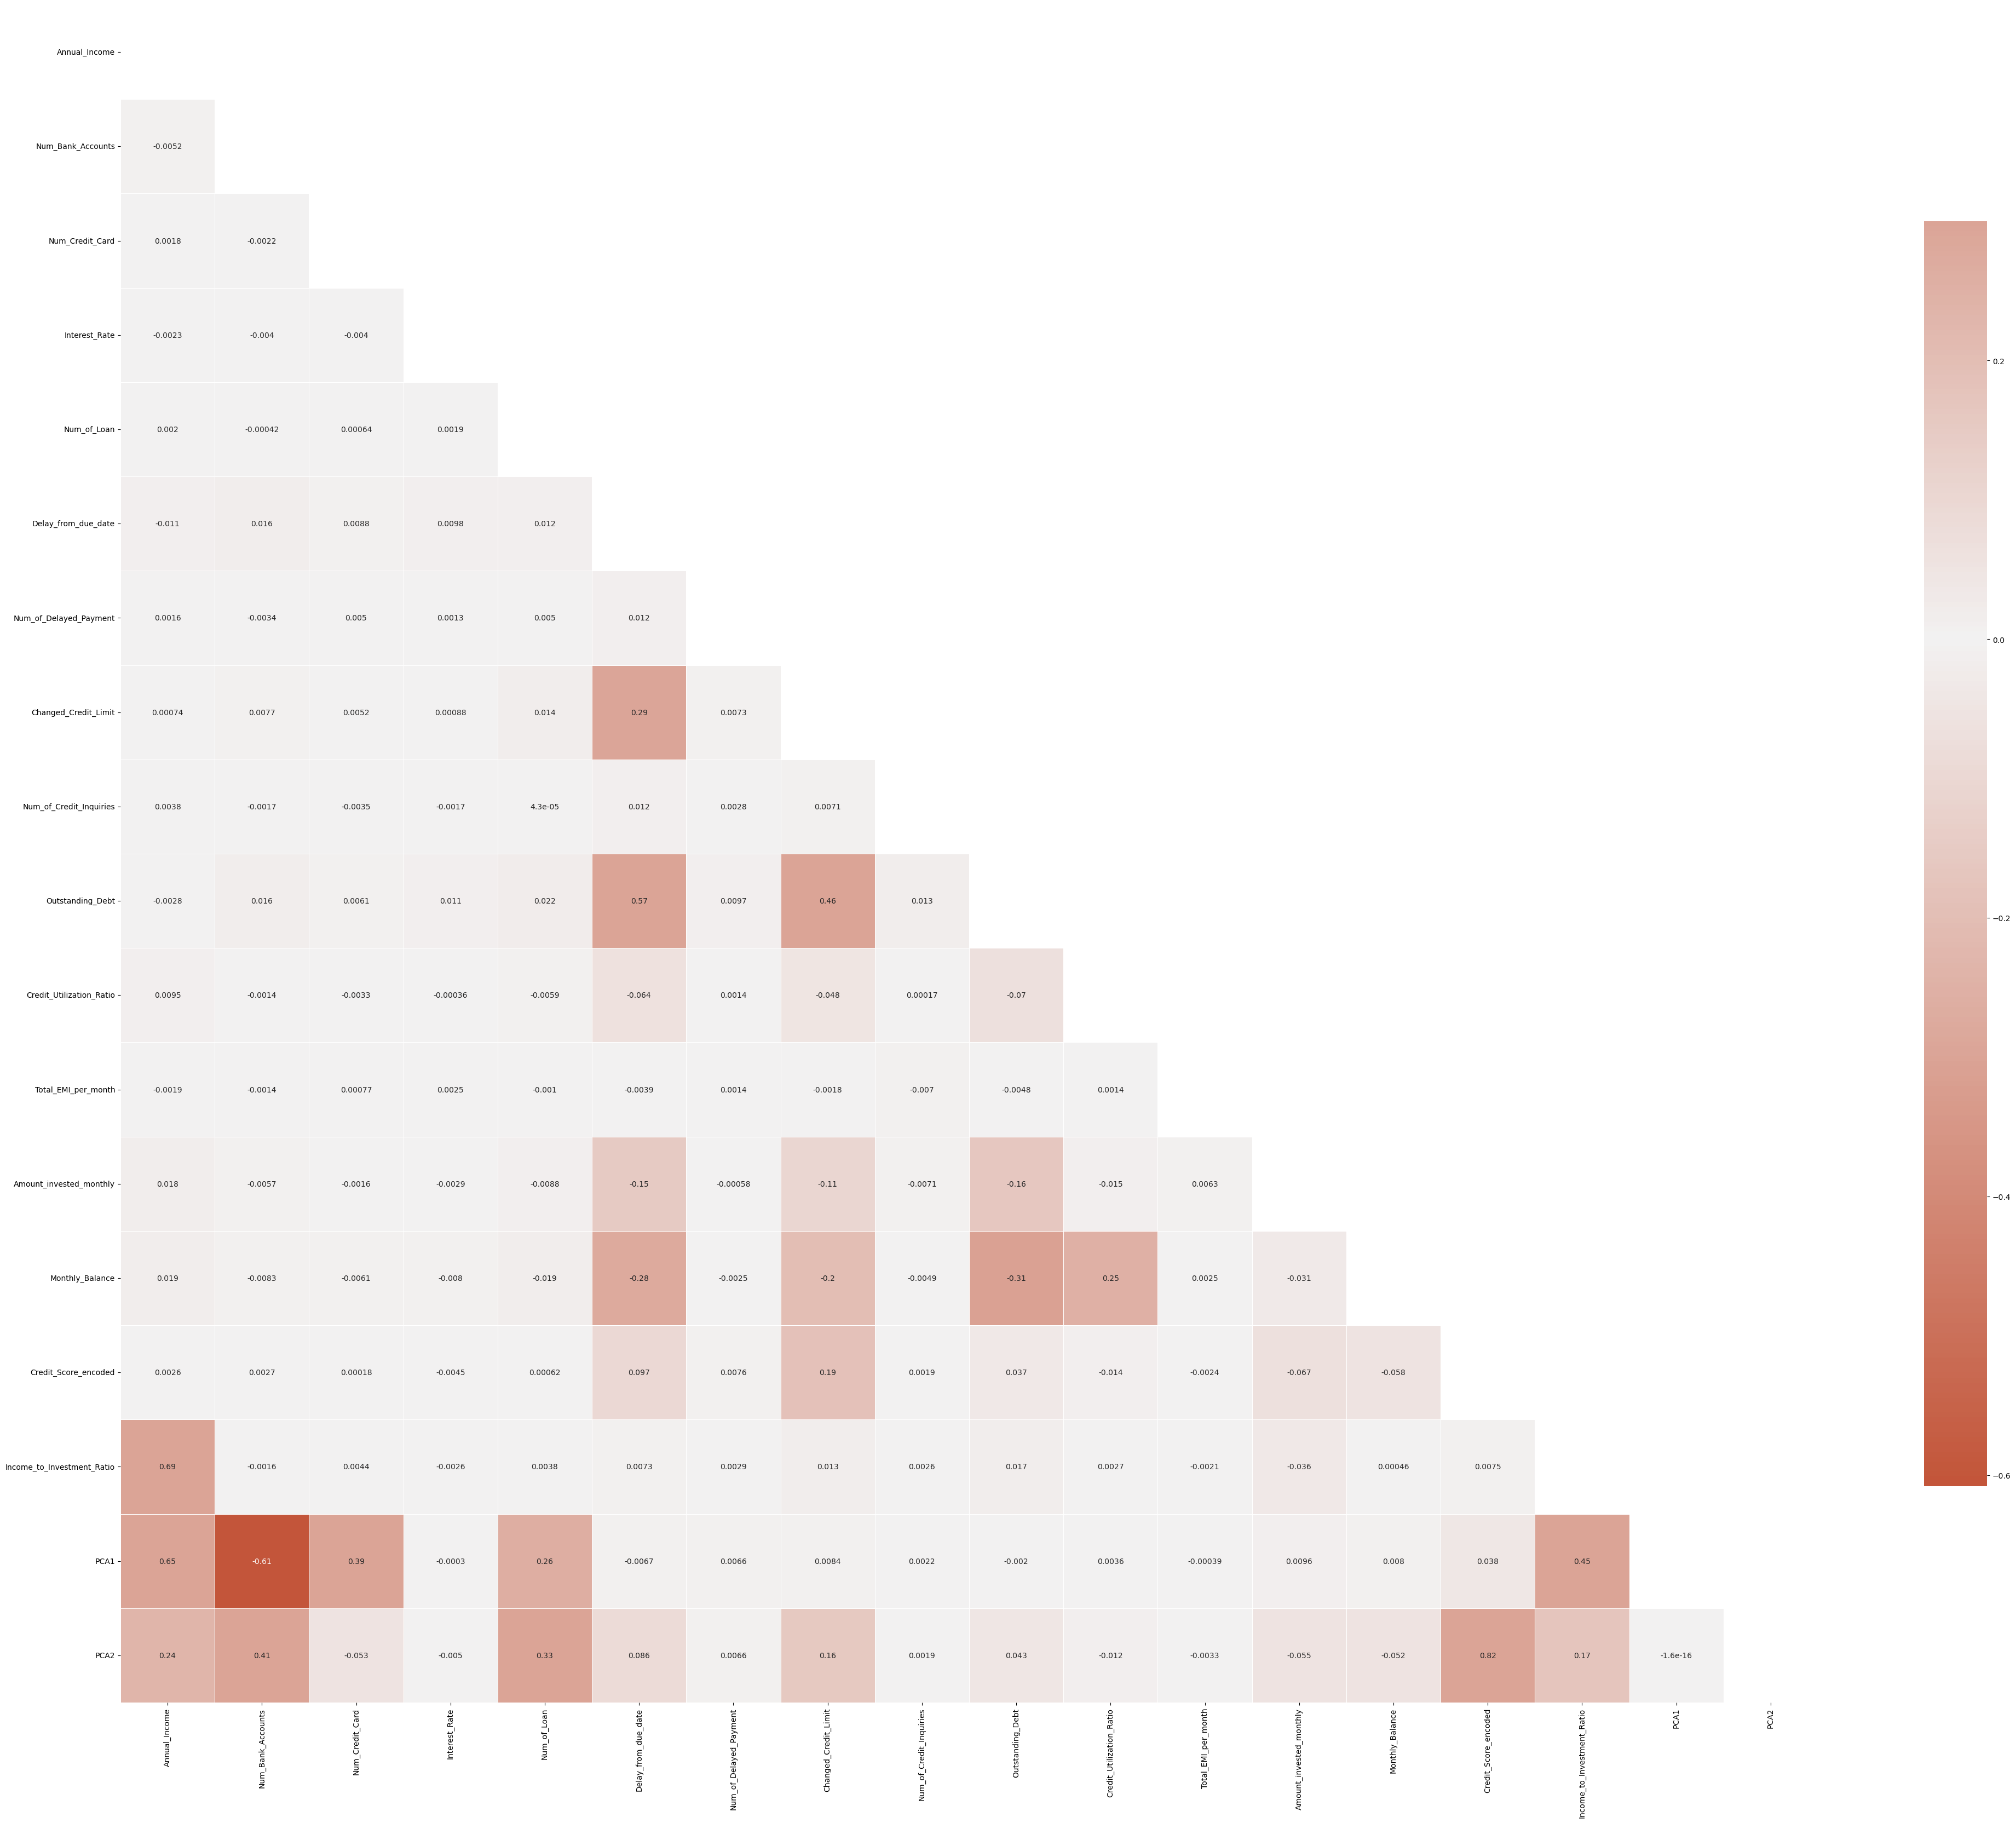

In [24]:
#do EDA
#Correlation Matrx
numeric_df = data.select_dtypes(include=[np.number])
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(50, 60))
cmap = sns.diverging_palette(20, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

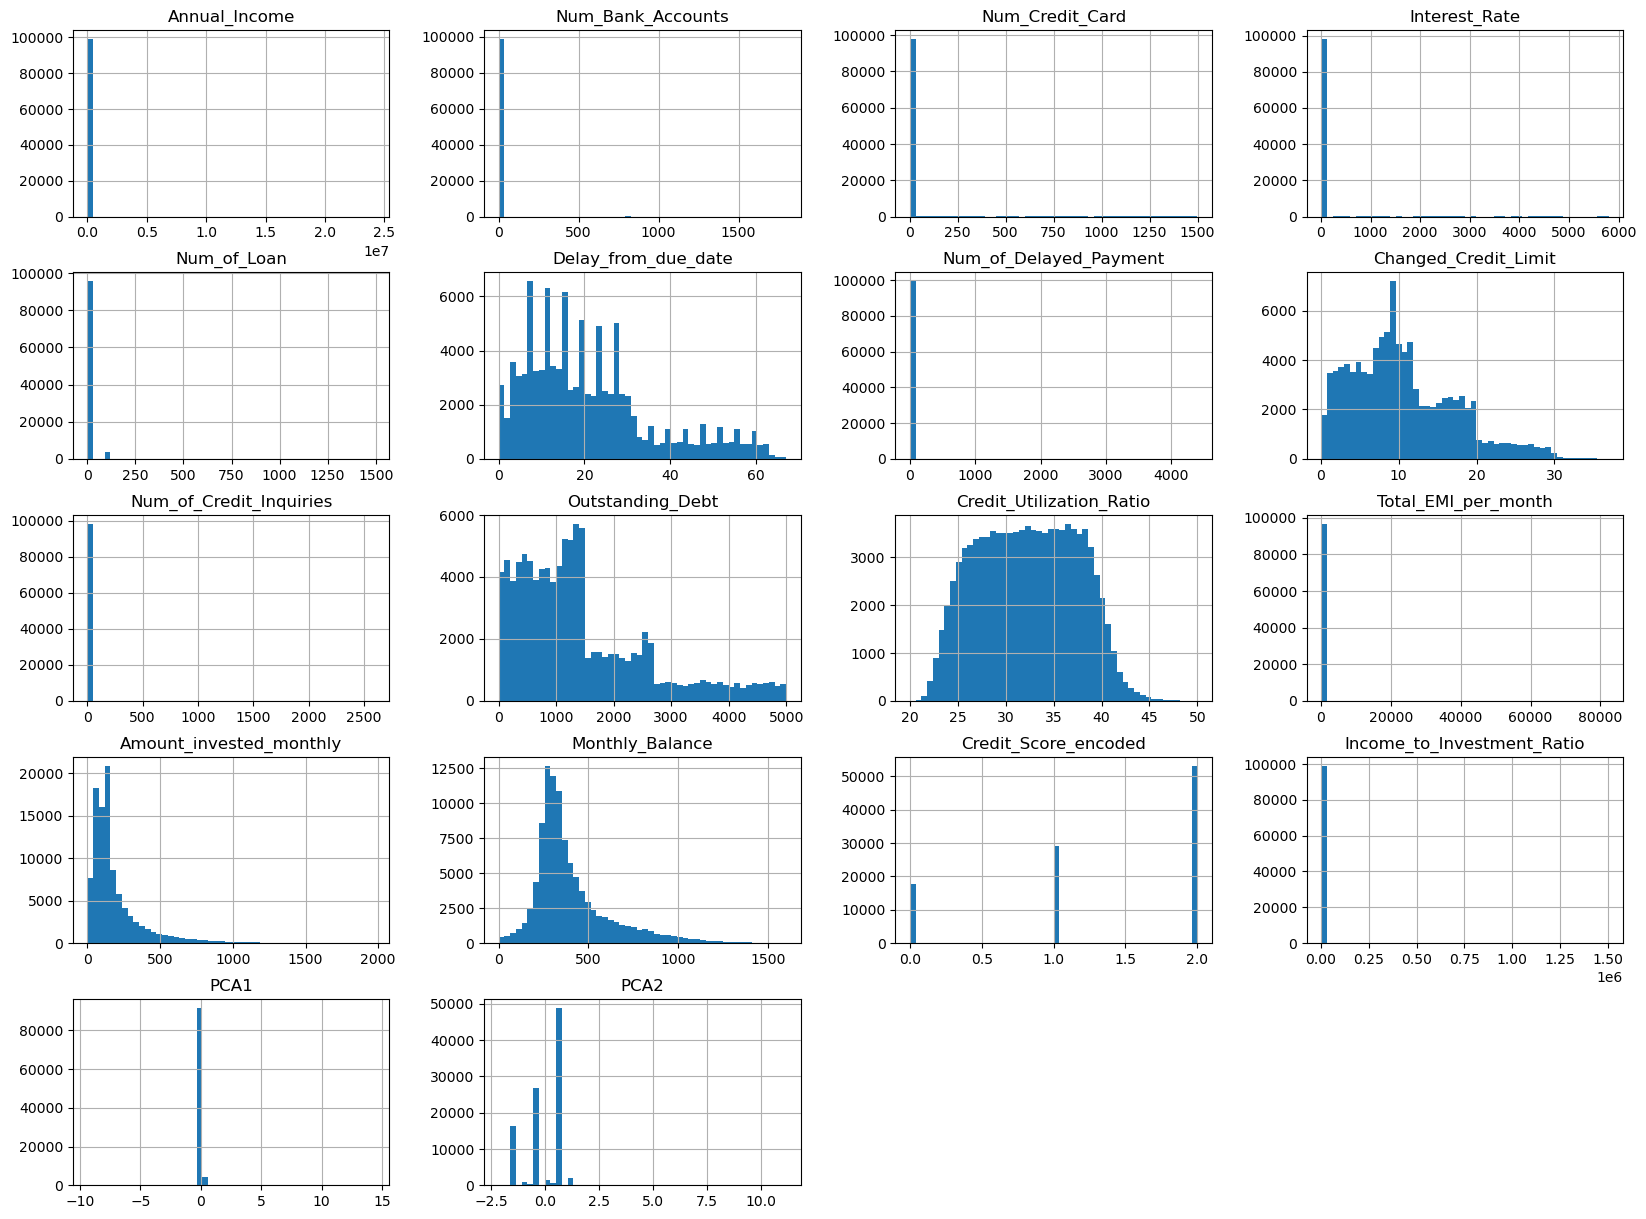

In [25]:
#histograms
data.hist(bins=50, figsize=(20,15))
plt.show()

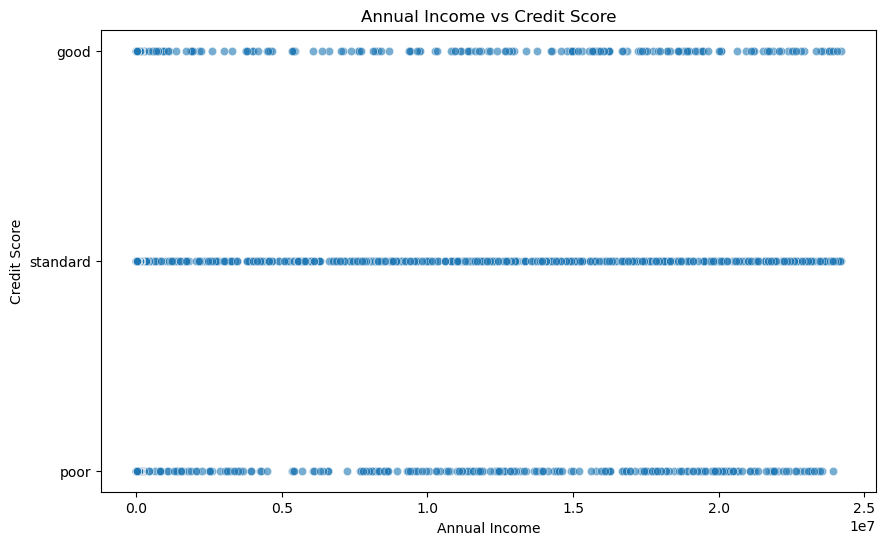

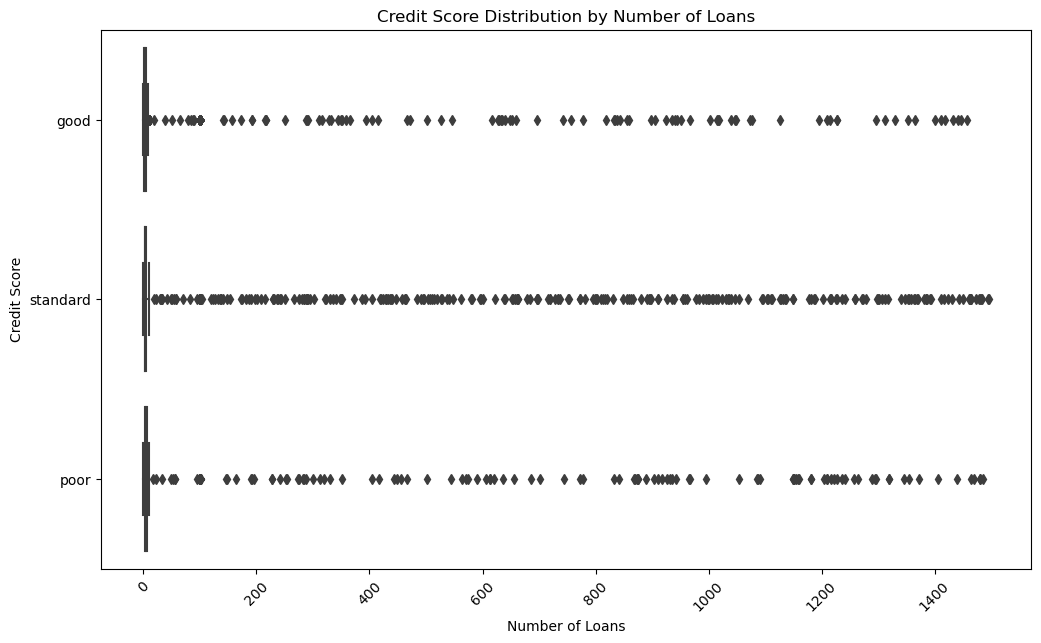

In [26]:
#Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual_Income', y='Credit_Score', alpha=0.6)
plt.title('Annual Income vs Credit Score')
plt.xlabel('Annual Income')
plt.ylabel('Credit Score')
plt.show()

plt.figure(figsize=(12, 7))
sns.boxplot(x='Num_of_Loan', y='Credit_Score', data=data)
plt.title('Credit Score Distribution by Number of Loans')
plt.xlabel('Number of Loans')
plt.ylabel('Credit Score')
plt.xticks(rotation=45) 
plt.show()

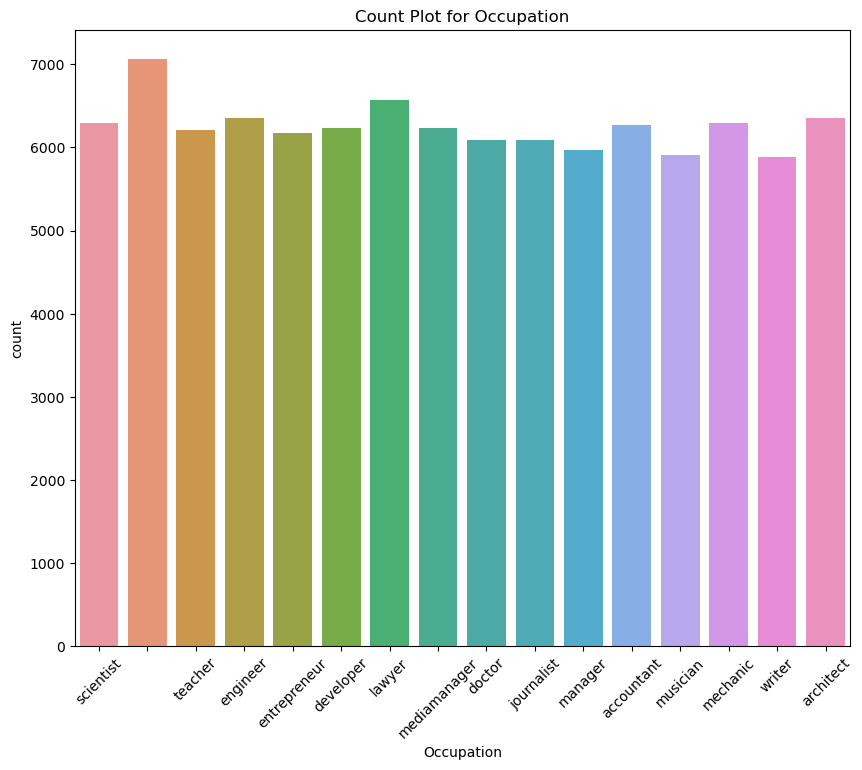

In [27]:
# Count plot for a categorical variable
plt.figure(figsize=(10, 8))
sns.countplot(x=data['Occupation'])
plt.title('Count Plot for Occupation')
plt.xticks(rotation=45)
plt.show()

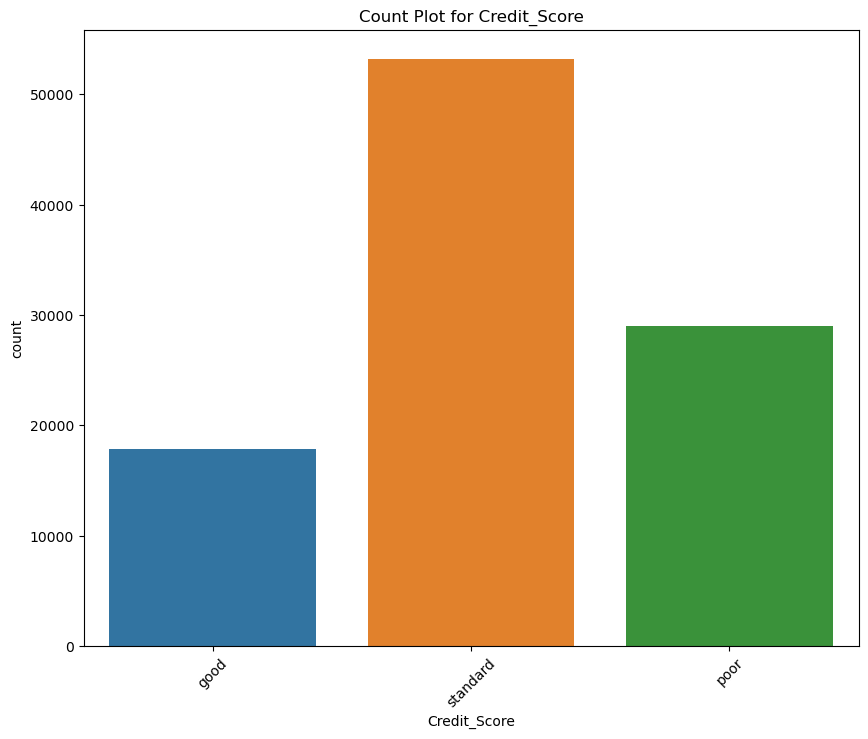

In [28]:
# Count plot for a categorical variable
plt.figure(figsize=(10, 8))
sns.countplot(x=data['Credit_Score'])
plt.title('Count Plot for Credit_Score')
plt.xticks(rotation=45)
plt.show()

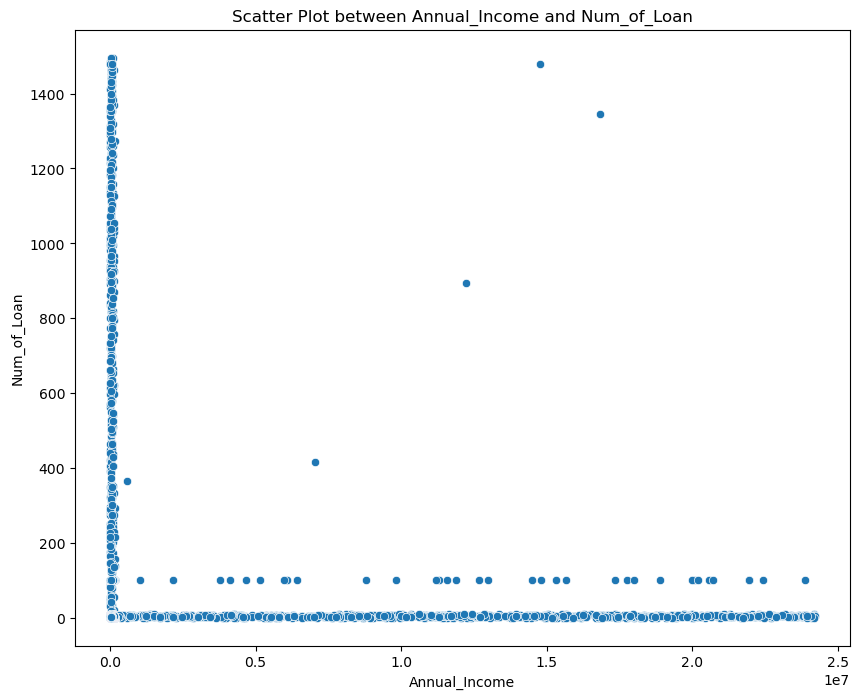

In [29]:
# Scatter plot between two numerical variables
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['Annual_Income'], y=data['Num_of_Loan'])
plt.title('Scatter Plot between Annual_Income and Num_of_Loan')
plt.show()

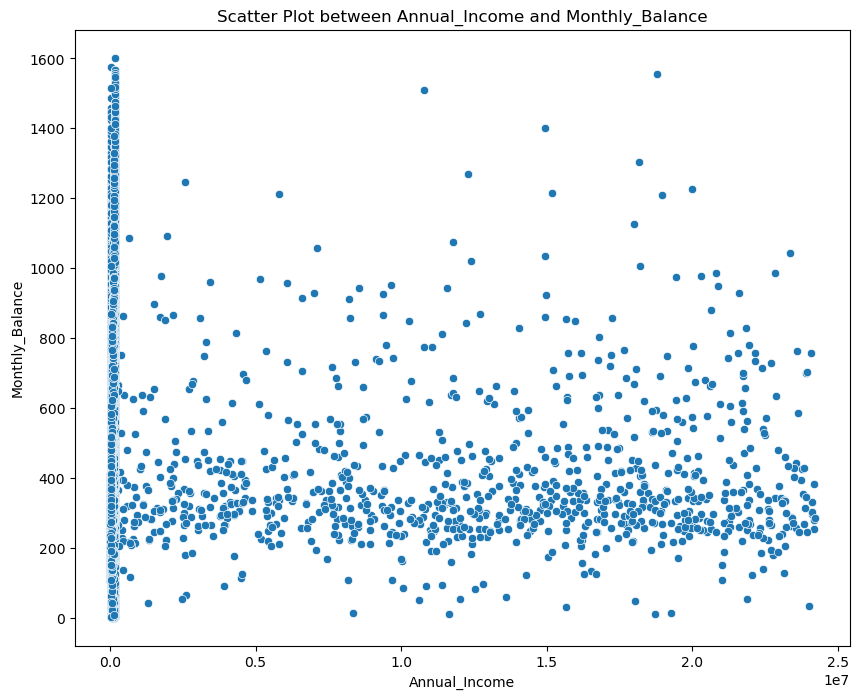

In [30]:
# Scatter plot between two numerical variables
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['Annual_Income'], y=data['Monthly_Balance'])
plt.title('Scatter Plot between Annual_Income and Monthly_Balance')
plt.show()

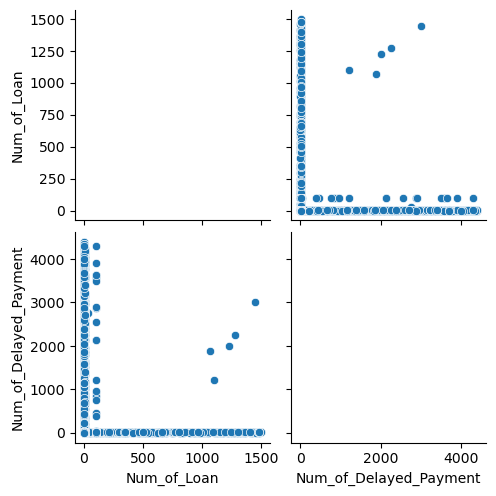

In [31]:
# Pair plot for a subset of variables
sns.pairplot(data[['Num_of_Loan', 'Num_of_Delayed_Payment', 'Credit_Score']])
plt.show()

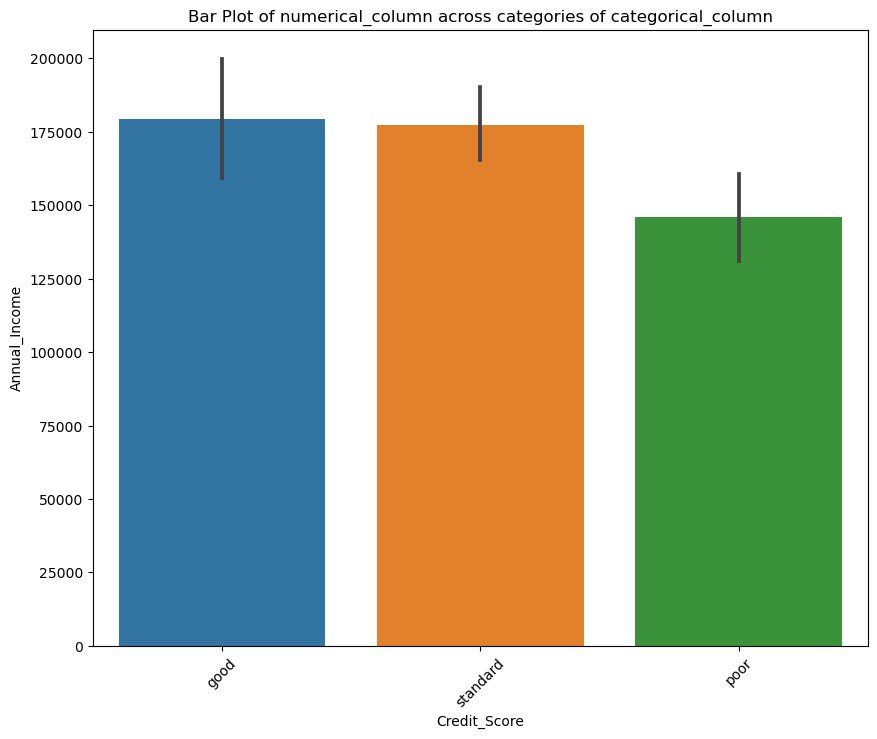

In [32]:
# Bar plot of average value of a numerical variable for each category
plt.figure(figsize=(10, 8))
sns.barplot(x=data['Credit_Score'], y=data['Annual_Income'])
plt.title('Bar Plot of numerical_column across categories of categorical_column')
plt.xticks(rotation=45)
plt.show()

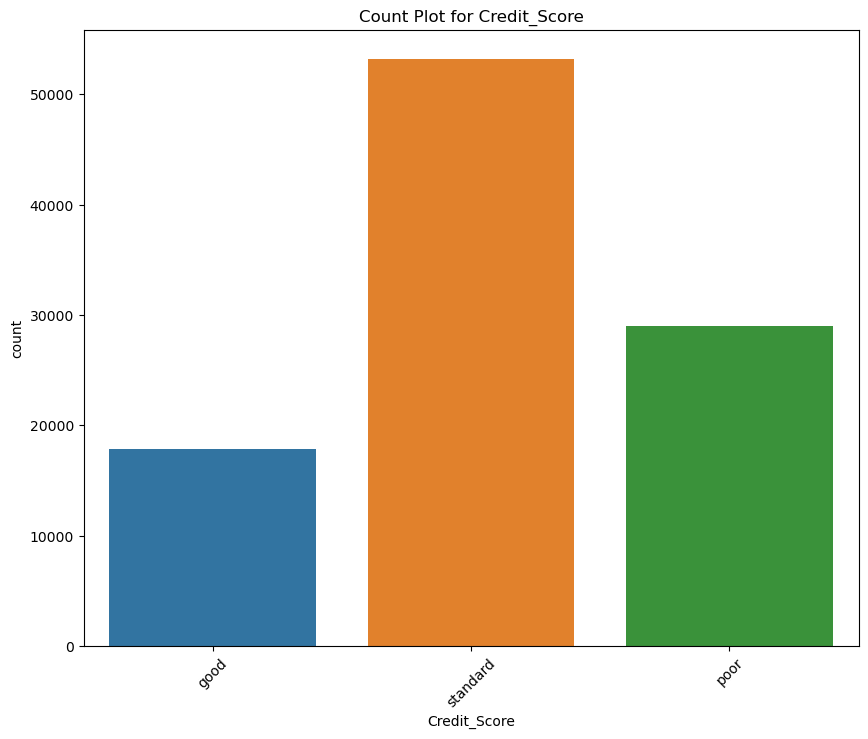

In [33]:
# Count plot for a categorical variable
plt.figure(figsize=(10, 8))
sns.countplot(x=data['Credit_Score'])
plt.title('Count Plot for Credit_Score')
plt.xticks(rotation=45)
plt.show()

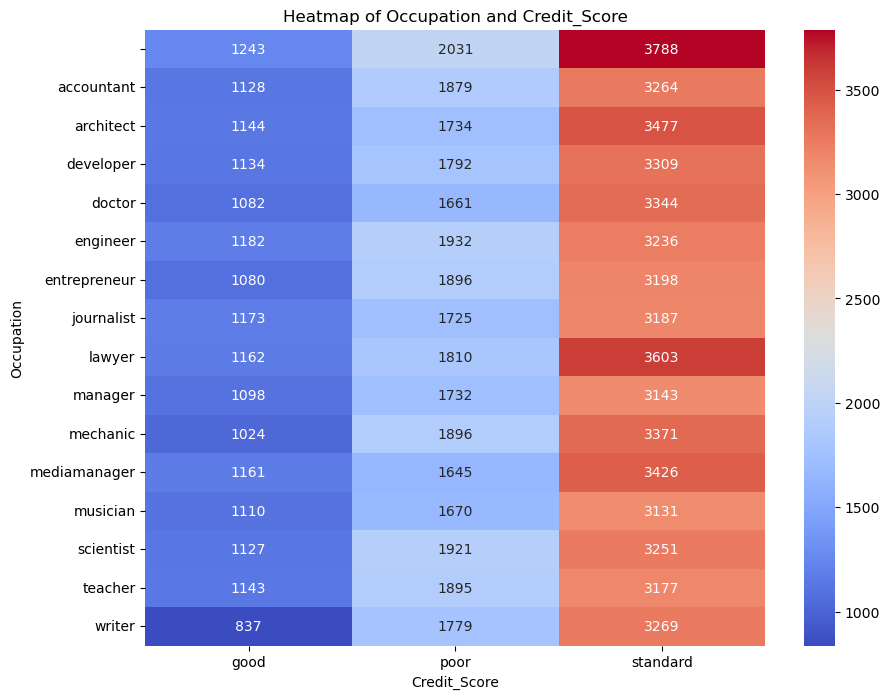

In [34]:
# Heatmap
cross_tab = pd.crosstab(index=data['Occupation'], columns=data['Credit_Score'])

plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Occupation and Credit_Score')
plt.show()